In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [4]:
from sklearn.metrics import confusion_matrix
dataset = pd.read_csv("parkinsons.data")
x=dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
y = dataset.iloc[:,17].values


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2)


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_

In [9]:
#K-Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric = 'minkowski')
classifi.fit(X_train,y_train)
y1_pred = classifi.predict(X_test)

KNeighbor Accuracy: 97.44%
[[10  1]
 [ 0 28]]


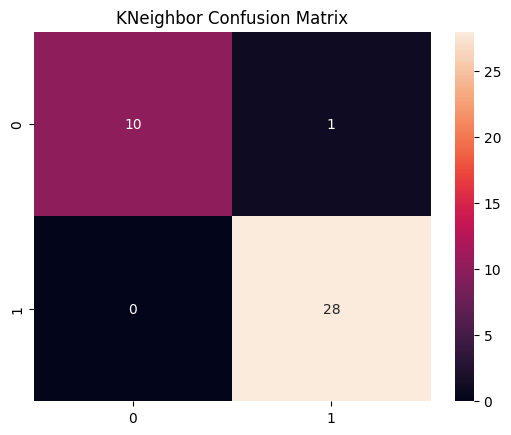

In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y1_pred)
print("KNeighbor Accuracy: {:.2f}%".format(accuracy*100))
cm = confusion_matrix(y_test,y1_pred)
print(cm)
df=pd.DataFrame(cm)
sn.heatmap(df,annot=True,fmt='')

# setting the title using Matplotlib
plt.title('KNeighbor Confusion Matrix')
plt.show()

In [11]:
#SVM Model
from sklearn.svm import SVC
classifi2 = SVC()
classifi2.fit(X_train,y_train)
y2_pred = classifi2.predict(X_test)

SVM Accuracy: 89.74%
[[ 7  4]
 [ 0 28]]


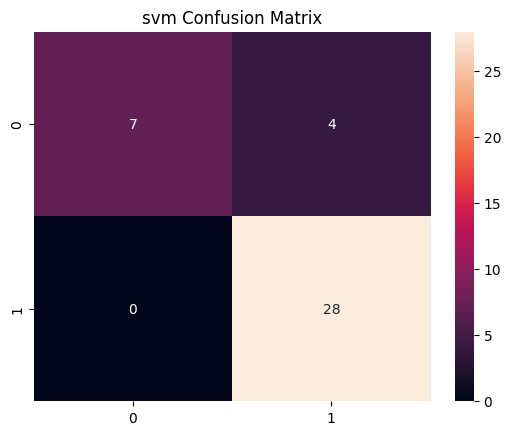

In [12]:
from sklearn.metrics  import accuracy_score
accuracy=accuracy_score(y_test,y2_pred)
print("SVM Accuracy: {:.2f}%".format(accuracy*100))
cm = confusion_matrix(y_test,y2_pred)
print(cm)
df=pd.DataFrame(cm)
sn.heatmap(df,annot=True,fmt='')

# setting the title using Matplotlib
plt.title('svm Confusion Matrix')
plt.show()


In [14]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifi3 = RandomForestClassifier(n_estimators = 16, criterion = 'entropy')
classifi3.fit(X_train,y_train)
y3_pred = classifi3.predict(X_test)

Randomforest Accuracy: 92.31%
[[ 9  2]
 [ 1 27]]


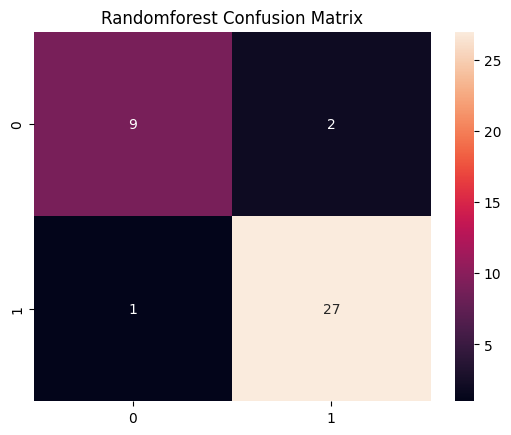

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y3_pred)
print("Randomforest Accuracy: {:.2f}%".format(accuracy*100))
cm = confusion_matrix(y_test,y3_pred)
print(cm)
df=pd.DataFrame(cm)
sn.heatmap(df,annot=True,fmt='')

# setting the title using Matplotlib
plt.title('Randomforest Confusion Matrix')
plt.show()

Logistic regression Accuracy: 86.54%
[[ 8  3]
 [ 1 27]]


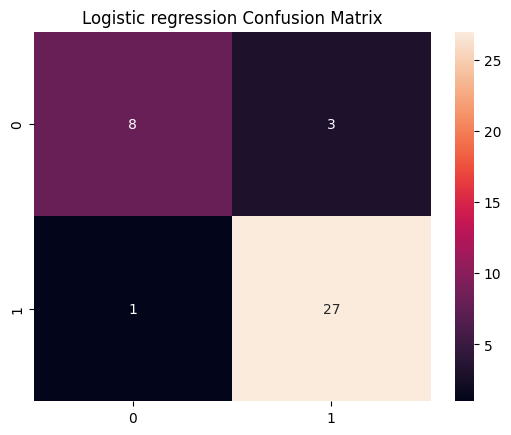

In [16]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
X_train_prediction=model.predict(X_train)
y4_pred=model.predict(X_test)
accuracy=accuracy_score(X_train_prediction,y_train)
print("Logistic regression Accuracy: {:.2f}%".format(accuracy*100))
cm = confusion_matrix(y_test,y4_pred)
print(cm)
df=pd.DataFrame(cm)
sn.heatmap(df,annot=True,fmt='')

# setting the title using Matplotlib
plt.title('Logistic regression Confusion Matrix')
plt.show()